# 1. Carga de los datos

In [1]:
#Ejecutar en terminal: pip install -r requirements.txt

import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Set the path to the file you'd like to load
file_path = "./Student_Performance.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "nikhil7280/student-performance-multiple-linear-regression",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

First 5 records:    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


## Cargar el dataset en Dataframe

In [2]:
# Cargar el dataset en un DataFrame
import pandas as pd

df = pd.read_csv("Student_Performance.csv")

# Explorar la estructura del dataset
print("Forma del DataFrame (filas, columnas):", df.shape)
print("\nTipos de datos de cada columna:")
print(df.dtypes)
print("\nPrimeras 10 filas del DataFrame:")
print(df.head(10))
print("\n================================= Información del DataFrame (memoria, tipos de datos) ==============================")
df.info()

# Estadísticas descriptivas
print("\n================================= Estadísticas Descriptivas (media, std, min, max) ==============================")
print(df.describe())

Forma del DataFrame (filas, columnas): (10000, 6)

Tipos de datos de cada columna:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Primeras 10 filas del DataFrame:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   
5              3               78                         No            9   
6              7               73                        Yes      

# Análisis de características

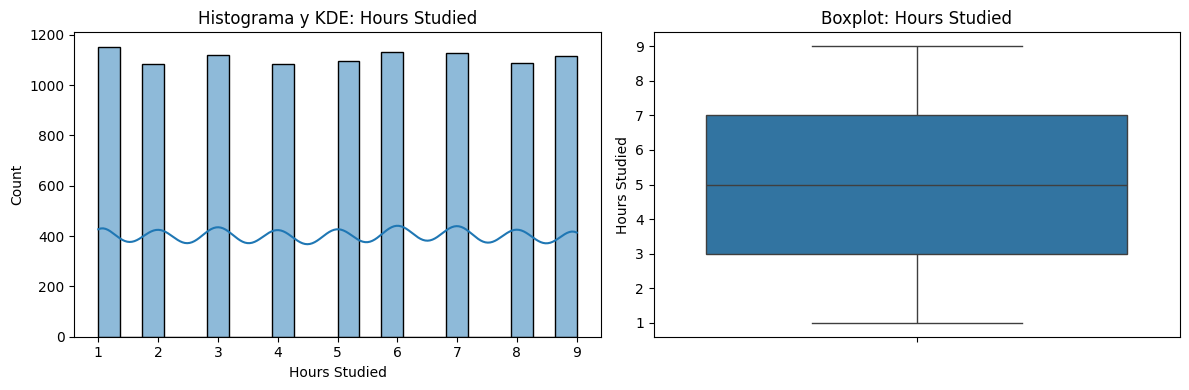

Estadísticos de Hours Studied:
count    10000.000000
mean         4.992900
std          2.589309
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Hours Studied, dtype: float64
Asimetría: -0.004, Curtosis: -1.232



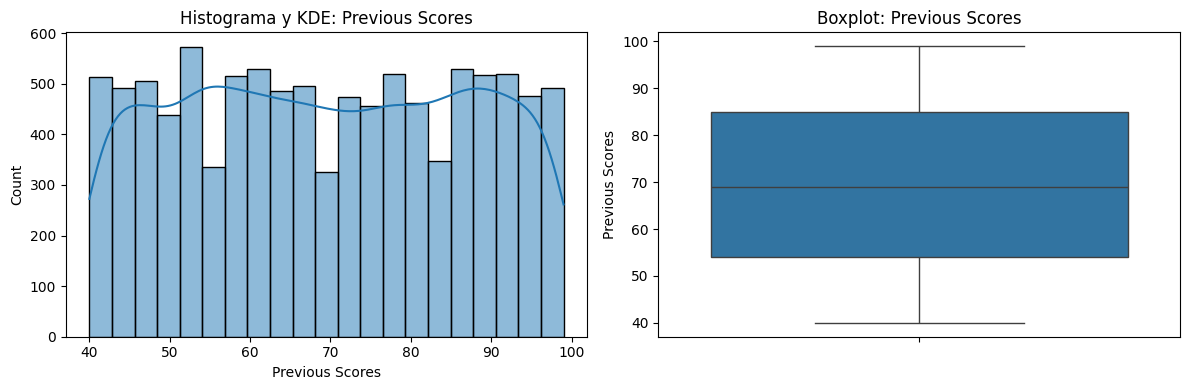

Estadísticos de Previous Scores:
count    10000.000000
mean        69.445700
std         17.343152
min         40.000000
25%         54.000000
50%         69.000000
75%         85.000000
max         99.000000
Name: Previous Scores, dtype: float64
Asimetría: 0.005, Curtosis: -1.213



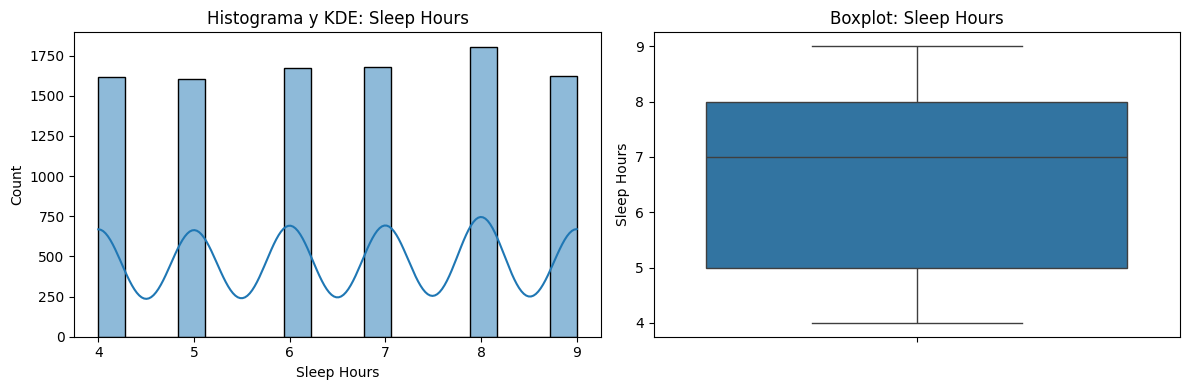

Estadísticos de Sleep Hours:
count    10000.000000
mean         6.530600
std          1.695863
min          4.000000
25%          5.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Sleep Hours, dtype: float64
Asimetría: -0.039, Curtosis: -1.257



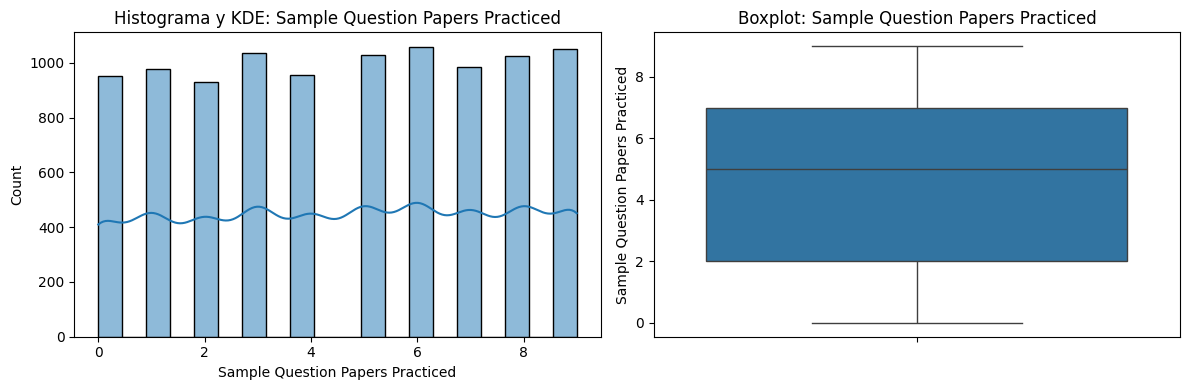

Estadísticos de Sample Question Papers Practiced:
count    10000.000000
mean         4.583300
std          2.867348
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Sample Question Papers Practiced, dtype: float64
Asimetría: -0.036, Curtosis: -1.215



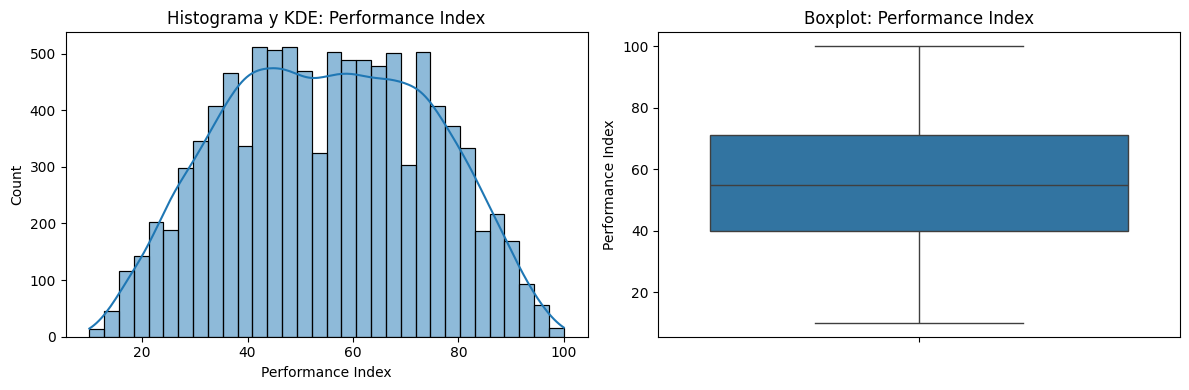

Estadísticos de Performance Index:
count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64
Asimetría: -0.002, Curtosis: -0.861



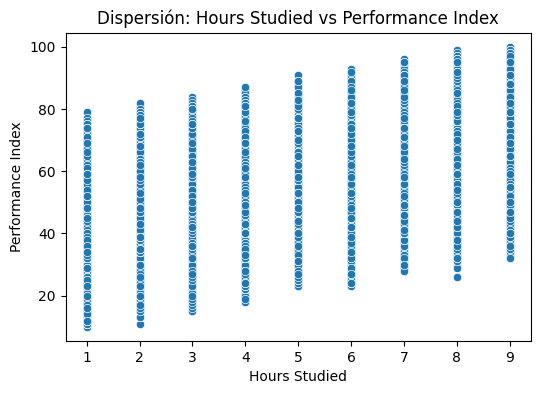

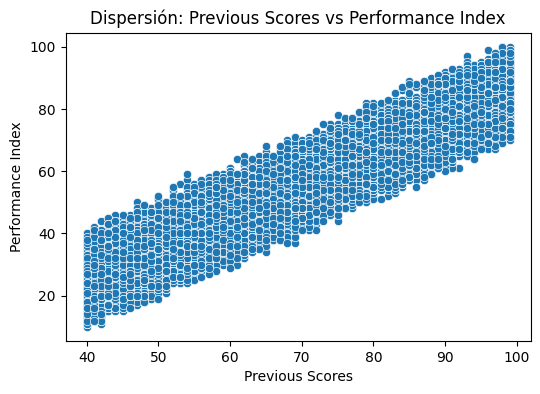

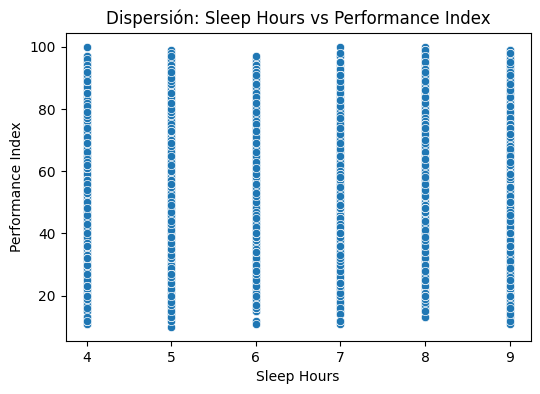

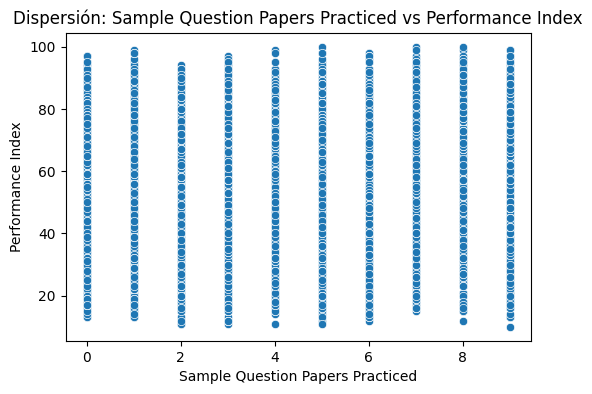

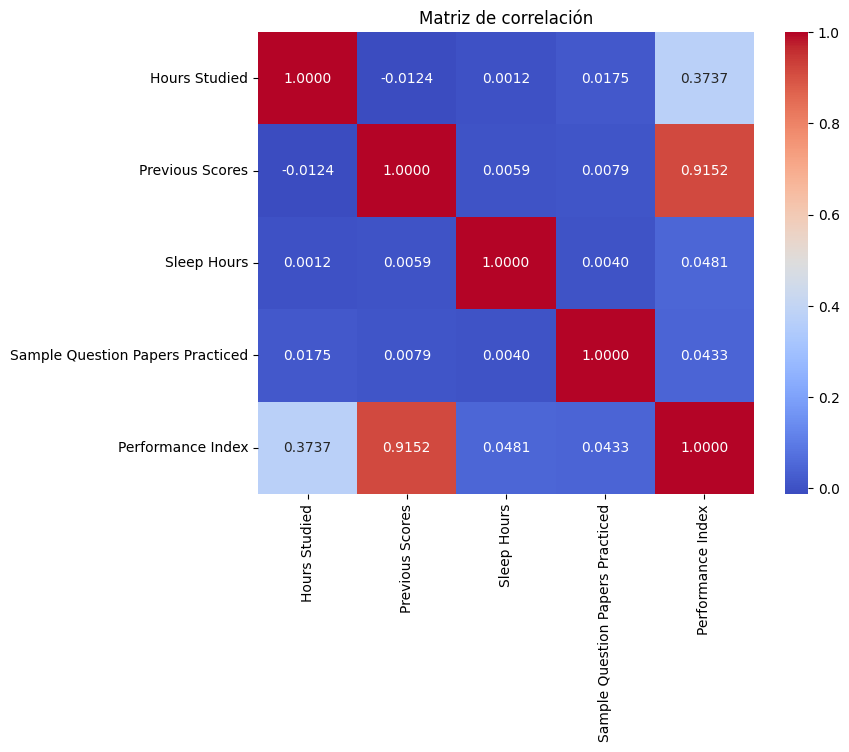

=== Detección de outliers (criterio 1.5*IQR) ===
Hours Studied: 0 outliers
Previous Scores: 0 outliers
Sleep Hours: 0 outliers
Sample Question Papers Practiced: 0 outliers
Performance Index: 0 outliers

=== Interpretación y tratamiento de outliers ===
- Hours Studied: No se detectaron valores atípicos significativos.
- Previous Scores: No se detectaron valores atípicos significativos.
- Sleep Hours: No se detectaron valores atípicos significativos.
- Sample Question Papers Practiced: No se detectaron valores atípicos significativos.
- Performance Index: No se detectaron valores atípicos significativos.


In [3]:
# --- Análisis exploratorio de datos (EDA) ---

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Histogramas y boxplots de variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histograma y KDE: {col}")
    sns.boxplot(y=df[col], ax=axs[1])
    axs[1].set_title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()
    print(f"Estadísticos de {col}:")
    print(df[col].describe())
    print(f"Asimetría: {df[col].skew():.3f}, Curtosis: {df[col].kurtosis():.3f}\n")

# 2. Diagramas de dispersión entre características numéricas y el target
target = 'Performance Index'
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"Dispersión: {col} vs {target}")
        plt.show()

# 3. Matriz de correlación y mapa de calor
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Matriz de correlación")
plt.show()

# 4. Identificación de outliers usando el criterio de rango intercuartílico (IQR)
print("=== Detección de outliers (criterio 1.5*IQR) ===")
outlier_report = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    n_outliers = outliers.shape[0]
    outlier_report[col] = n_outliers
    print(f"{col}: {n_outliers} outliers")

# 5. Interpretación y tratamiento de outliers
print("\n=== Interpretación y tratamiento de outliers ===")
for col, n_outliers in outlier_report.items():
    if n_outliers > 0:
        print(f"- {col}: Se detectaron {n_outliers} valores atípicos. Se recomienda revisar si son errores de captura o valores extremos válidos. Si afectan el análisis, considerar su tratamiento (eliminación o imputación).")
    else:
        print(f"- {col}: No se detectaron valores atípicos significativos.")


### Eliminacion de Datos repetidos

¿Porque eliminar los datos?
La existencia de estos puede llevar a un sobre entrenamiento (overfitting) lo cual provocaría que el modelo se sobre adecúe a esos datos y pierda su capacidad de generalizar, esto con datasets muy grandes no ocurre, siempre y cuando la cantidad de datos repetidos sea muy baja en relación al tamaño del dataset, sin embargo es buena practica eliminarlos, debido a esto, se eliminan los repetidos.



In [4]:
print("Duplicados totales:", df.duplicated().sum())  #Obtenemos el total de datos repetidos
print(df[df.duplicated()])  #Mostramos los datos repetidos

df = df.drop_duplicates()  #Eliminamos los datos repetidos  
print("Duplicados totales:", df.duplicated().sum())  #Verificamos que ya no hay datos repetidos

Duplicados totales: 127
      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
915               9               52                         No            5   
1477              7               61                        Yes            6   
1601              5               99                         No            7   
1786              2               62                        Yes            9   
2026              5               87                        Yes            6   
...             ...              ...                        ...          ...   
9644              4               91                        Yes            4   
9940              8               95                         No            5   
9954              6               97                         No            8   
9966              1               41                         No            7   
9985              8               99                         No            5   

      Sample Qu

## Normalización de los datos
---

##### ¿Porque normalizar los datos?

El motivo de realizar la normalización de los datos es establecerlos todos en una escala similar, esto debido a que en el dataset como se puede apreciar se toman datos muy diferenciados en sus escalas, por ejemplo "previous scores" las cuales llegan hasta el 99, comparandolo con por ejemplo sleep hours, queda muy separada la escala, lo cual va a generar que al realizar los calculos del descenso del gradiente, le asigne mayor peso al feature con mayor tamaño, haciendolo más relevante en la regresión, cuando puede no serlo. 

In [5]:
# Copiar dataframe para no modificar el original
df_norm = df.copy()

# Convertir columna categórica a numérica (Yes=1, No=0)
df_norm["Extracurricular Activities"] = df_norm["Extracurricular Activities"].map({"Yes": 1, "No": 0})

# Se escogen las columnas a normalizar (todas menos PerformanceIndex y la categórica)
cols_to_normalize = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]

# Normalizar con Z-score
for col in cols_to_normalize:
    mean = df_norm[col].mean()
    std = df_norm[col].std()
    df_norm[col] = (df_norm[col] - mean) / std

# Mostrar primeras filas normalizadas

print("---Columnas sin normalizar---\n" , df.head(),"\n\n---Columnas normalizadas---\n" , df_norm.head())

---Columnas sin normalizar---
    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0   

---Columnas normalizadas---
    Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.775526         1.706082                      

# Division del Dataset

In [6]:
import numpy as np
import pandas as pd

# 1) Muestreo aleatorio (Random Sampling)
np.random.seed(50)  # Para reproducibilidad
indices = np.random.permutation(len(df_norm))
n_total = len(df_norm)
n_train = int(0.7 * n_total)
n_val = int(0.15 * n_total)
n_test = int(0.15 * n_total)

train_idx = indices[:n_train]
val_idx = indices[n_train:n_train + n_val]
test_idx = indices[n_train + n_val:]

df_train_random = df_norm.iloc[train_idx].reset_index(drop=True)
df_val_random = df_norm.iloc[val_idx].reset_index(drop=True)
df_test_random = df_norm.iloc[test_idx].reset_index(drop=True)







print("Random Sampling:")
print(f"Entrenamiento: {df_train_random.shape}, Validación: {df_val_random.shape}, Prueba: {df_test_random.shape}")

# 2) Muestreo estratificado (Stratified Sampling) usando la variable categórica
# Usaremos 'Extracurricular Activities' como variable de estratificación
strat_col = 'Extracurricular Activities'
df_strat = df_norm.copy()
df_train_strat = pd.DataFrame()
df_val_strat = pd.DataFrame()
df_test_strat = pd.DataFrame()

for group, group_df in df_strat.groupby(strat_col):
    idx = np.random.permutation(len(group_df))
    n = len(group_df)
    n_train = int(0.7 * n)
    n_val = int(0.15 * n)
    n_test = int(0.15 * n)

    train_idx = idx[:n_train]
    val_idx = idx[n_train:n_train + n_val]
    test_idx = idx[n_train + n_val:]

    df_train_strat = pd.concat([df_train_strat, group_df.iloc[train_idx]], axis=0)
    df_val_strat = pd.concat([df_val_strat, group_df.iloc[val_idx]], axis=0)
    df_test_strat = pd.concat([df_test_strat, group_df.iloc[test_idx]], axis=0)

df_train_strat = df_train_strat.sample(frac=1, random_state=50).reset_index(drop=True)
df_val_strat = df_val_strat.sample(frac=1, random_state=50).reset_index(drop=True)
df_test_strat = df_test_strat.sample(frac=1, random_state=50).reset_index(drop=True)

print("\nStratified Sampling (por Extracurricular Activities):")
print(f"Entrenamiento: {df_train_strat.shape}, Validación: {df_val_strat.shape}, Prueba: {df_test_strat.shape}")

Random Sampling:
Entrenamiento: (6911, 6), Validación: (1480, 6), Prueba: (1482, 6)

Stratified Sampling (por Extracurricular Activities):
Entrenamiento: (6910, 6), Validación: (1480, 6), Prueba: (1483, 6)



### Inicio Regresión
---

Una vez Divididos en las formas de sampling, se procede a iniciar con la regresión lineal del descenso del gradiente, con esto se busca pulir los valores w y b de la función para aproximarlo a uno de los minimos de la función

Se empezará con el modelo random de sampling

## Se sacan los valores de X, Y

Se sacan los valores respectivos para cada conjunto, xs y ys para Training, validation y testing 

In [7]:
target_col = "Performance Index"
feature_cols = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "Extracurricular Activities"  #Esta se convirtió a 0s y 1s
]

# ---- construir X,y (train/val/test)
X_train = df_train_random[feature_cols].to_numpy(dtype=float)
y_train = df_train_random[target_col].to_numpy(dtype=float)

X_val   = df_val_random[feature_cols].to_numpy(dtype=float)
y_val   = df_val_random[target_col].to_numpy(dtype=float)

X_test  = df_test_random[feature_cols].to_numpy(dtype=float)
y_test  = df_test_random[target_col].to_numpy(dtype=float)

In [8]:
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)  #Mean Squared Error, utilizada para evaluar el rendimiento del modelo y penalizar el error grande



def predict(X, w, b):
   return X.dot(w) + b 

learning_rate = 0.01
epochs = 1000


def batch_gradient_descent(X, y, w, b, learning_rate, epochs):
    

    
    return w, b





## Stratified sampling

In [18]:
# 1. Selecciona las columnas de features y target
target_col = "Performance Index"
feature_cols = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "Extracurricular Activities"
]

# ---- construir X,y (train/val/test)
X_train = df_train_strat[feature_cols].to_numpy(dtype=float)
y_train = df_train_strat[target_col].to_numpy(dtype=float)

X_val   = df_val_strat[feature_cols].to_numpy(dtype=float)
y_val   = df_val_strat[target_col].to_numpy(dtype=float)

X_test  = df_test_strat[feature_cols].to_numpy(dtype=float)
y_test  = df_test_strat[target_col].to_numpy(dtype=float)


# 3. Implementar Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    for epoch in range(epochs):
        y_pred = X.dot(w) + b
        error = y_pred - y
        # Gradientes
        dw = (2/n_samples) * X.T.dot(error)
        db = (2/n_samples) * np.sum(error)
        # Actualización de parámetros
        w -= learning_rate * dw
        b -= learning_rate * db
        # (Opcional) Mostrar el error cada 100 épocas
        if epoch % 100 == 0:
            mse = np.mean(error**2)
            print(f"Epoch {epoch}: MSE={mse:.4f}")
    return w, b

# 4. Entrenar el modelo
w, b = batch_gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000)

# 5. Evaluar el modelo
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

y_pred_train = X_train.dot(w) + b
y_pred_val = X_val.dot(w) + b
y_pred_test = X_test.dot(w) + b

print("MSE Train:", MSE(y_train, y_pred_train))
print("MSE Val:", MSE(y_val, y_pred_val))
print("MSE Test:", MSE(y_test, y_pred_test))

# Mini Batch Gradient Descent para stratified sampling 

def mini_batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000, batch_size=16):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            y_pred = X_batch.dot(w) + b
            error = y_pred - y_batch
            dw = (2 / len(X_batch)) * X_batch.T.dot(error)
            db = (2 / len(X_batch)) * np.sum(error)
            w -= learning_rate * dw
            b -= learning_rate * db
        # Mostrar el error cada 100 épocas
        if epoch % 100 == 0:
            y_pred_full = X.dot(w) + b
            mse = np.mean((y - y_pred_full) ** 2)
            print(f"Epoch {epoch}: MSE={mse:.4f}")
    return w, b

# Entrenamiento con mini batch
w_mb, b_mb = mini_batch_gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000, batch_size=16)

# Evaluación
y_pred_train_mb = X_train.dot(w_mb) + b_mb
y_pred_val_mb = X_val.dot(w_mb) + b_mb
y_pred_test_mb = X_test.dot(w_mb) + b_mb

print("Mini Batch MSE Train:", MSE(y_train, y_pred_train_mb))
print("Mini Batch MSE Val:", MSE(y_val, y_pred_val_mb))
print("Mini Batch MSE Test:", MSE(y_test, y_pred_test_mb))

Epoch 0: MSE=3423.1945
Epoch 100: MSE=95.5442
Epoch 200: MSE=37.0248
Epoch 300: MSE=19.2970
Epoch 400: MSE=11.1566
Epoch 500: MSE=7.3818
Epoch 600: MSE=5.6309
Epoch 700: MSE=4.8188
Epoch 800: MSE=4.4421
Epoch 900: MSE=4.2673
MSE Train: 4.186286425062504
MSE Val: 4.50590105078555
MSE Test: 4.370827276439789
Epoch 0: MSE=9.7571
Epoch 100: MSE=4.1182
Epoch 200: MSE=4.1261
Epoch 300: MSE=4.1334
Epoch 400: MSE=4.1202
Epoch 500: MSE=4.1256
Epoch 600: MSE=4.1211
Epoch 700: MSE=4.1277
Epoch 800: MSE=4.1278
Epoch 900: MSE=4.1212
Mini Batch MSE Train: 4.1270642147352365
Mini Batch MSE Val: 4.364841088449813
Mini Batch MSE Test: 4.30602162496036


### Evaluación del modelo usando stratified sampling (Batch y Mini Batch Gradient Descent)

Se entrenó un modelo de regresión lineal utilizando descenso del gradiente sobre el conjunto obtenido por muestreo estratificado, evaluando tanto el método tradicional (Batch Gradient Descent) como el método Mini Batch Gradient Descent.

#### Batch Gradient Descent
Durante el entrenamiento, el error cuadrático medio (MSE) disminuyó rápidamente desde un valor inicial muy alto (3423.19) hasta estabilizarse en valores bajos. Al finalizar, los resultados fueron:

- **MSE en entrenamiento:** 4.19
- **MSE en validación:** 4.51
- **MSE en prueba:** 4.37

Esto indica que el modelo aprendió correctamente y generaliza bien, ya que los valores de MSE en los tres conjuntos son similares y bajos, lo que sugiere que no hay sobreajuste.

#### Mini Batch Gradient Descent
Con Mini Batch Gradient Descent, el MSE también disminuyó y se mantuvo estable a lo largo de las épocas, aunque partiendo de un valor inicial más bajo (9.76). Los resultados finales fueron:

- **Mini Batch MSE en entrenamiento:** 4.13
- **Mini Batch MSE en validación:** 4.36
- **Mini Batch MSE en prueba:** 4.31

El desempeño es muy similar al método batch, pero con la ventaja de un entrenamiento más eficiente y estable, ya que las actualizaciones de los parámetros se realizan varias veces por época usando pequeños subconjuntos de datos.

**Comparación y conclusiones:**  
Ambos métodos muestran que el modelo generaliza bien y no presenta sobreajuste. Mini Batch Gradient Descent logra resultados prácticamente iguales al método batch, pero es más eficiente computacionalmente y puede ser más robusto ante ruido en los datos.


## Análisis de Resultados usando Mini Batch Gradient Descent

Al comparar el resultado final del entrenamiento con el conjunto de prueba usando Mini Batch Gradient Descent, se obtuvo un **MSE en prueba de 4.31**, confirmando que el modelo generaliza correctamente a datos no vistos.

Para analizar el comportamiento de los errores, se graficaron los residuos (diferencia entre los valores reales y predichos) frente a las predicciones del modelo:


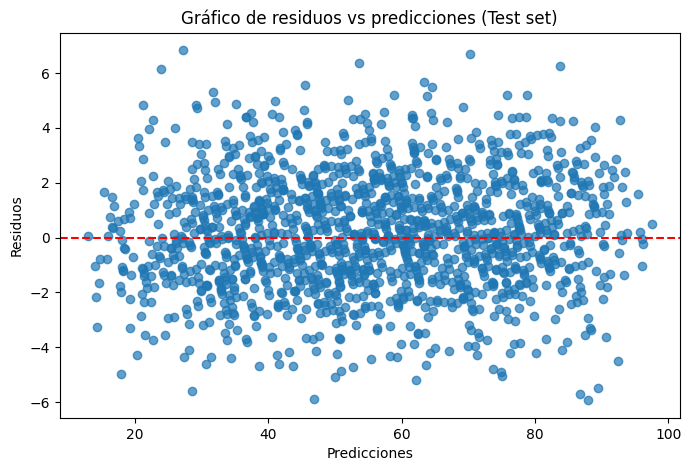

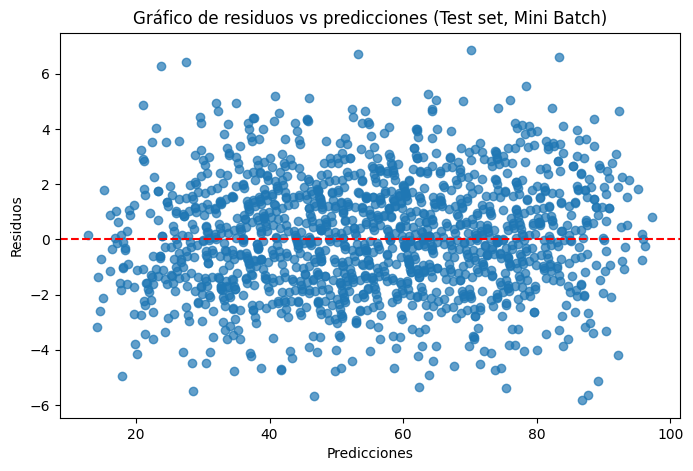

In [ ]:
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba usando Batch Gradient Descent
y_pred_test = X_test.dot(w) + b
residuos = y_test - y_pred_test

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test, residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs predicciones (Test set)')
plt.show()


# Predicciones en el conjunto de prueba usando Mini Batch Gradient Descent
y_pred_test_mb = X_test.dot(w_mb) + b_mb
residuos_mb = y_test - y_pred_test_mb

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test_mb, residuos_mb, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs predicciones (Test set, Mini Batch)')
plt.show()

El gráfico de residuos muestra que los errores se distribuyen de manera aleatoria alrededor de cero, sin patrones evidentes. Esto indica que el modelo no presenta sesgos sistemáticos y que la regresión lineal es adecuada para este conjunto de datos. La similitud de los valores de MSE en entrenamiento, validación y prueba refuerza la conclusión de que el modelo generaliza correctamente y no está sobreajustado, tanto con batch como con mini batch gradient descent